<a href="https://colab.research.google.com/github/alexgualberto/GST24/blob/main/Dados_Cambio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

# Exploração inicial dos dados

Os dados utilizados foram obtidos no site de [Dados Abertos do Banco do Brasil](https://dadosabertos.bcb.gov.br/dataset/10813-taxa-de-cambio---livre---dolar-americano-compra/resource/f02d92bd-bf7d-4bfe-b1c3-06938f7012c2)


In [ ]:
import pandas as pd

df = pd.read_csv('/content/cambio.csv')
df.head()

,data,valor
0,28/11/1984,2814
1,29/11/1984,2814
2,30/11/1984,2867
3,03/12/1984,2867
4,04/12/1984,2867


Como existe dados desde 1984, o tempo para processar tudo seria muito - logo, vou usar os dados a partir de 2010

In [ ]:
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')

df_filtered = df[df['data'] >= '2010-01-01']

print(df_filtered)

           data   valor
6279 2010-01-04  1,7232
6280 2010-01-05  1,7219
6281 2010-01-06  1,7329
6282 2010-01-07  1,7405
6283 2010-01-08  1,7382
...         ...     ...
9916 2024-06-28  5,5583
9917 2024-07-01  5,5887
9918 2024-07-02  5,6671
9919 2024-07-03  5,5857
9920 2024-07-04  5,4833

[3642 rows x 2 columns]


In [ ]:
df = df_filtered

In [ ]:
df['valor'] = df['valor'].str.replace(',', '.').astype(float)

df_monthly_mean = df_filtered.resample('M', on='data').mean()

print(df_monthly_mean)

               valor
data                
2010-01-31  1.779020
2010-02-28  1.840833
2010-03-31  1.785043
2010-04-30  1.755770
2010-05-31  1.812390
...              ...
2024-03-31  4.979535
2024-04-30  5.128486
2024-05-31  5.132448
2024-06-30  5.388375
2024-07-31  5.581200

[175 rows x 1 columns]


<ipython-input-87-4bdcfd9e7bcf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['valor'] = df['valor'].str.replace(',', '.').astype(float)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3642 entries, 6279 to 9920
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    3642 non-null   datetime64[ns]
 1   valor   3642 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.4 KB


In [ ]:
df.describe()

,data,valor
count,3642,3642.000000
mean,2017-04-01 16:08:41.911037696,3.501087
min,2010-01-04 00:00:00,1.533700
25%,2013-08-16 18:00:00,2.210500
50%,2017-03-29 12:00:00,3.354150
75%,2020-11-16 18:00:00,4.938325
max,2024-07-04 00:00:00,5.936600
std,NaN,1.329983


# Visualização

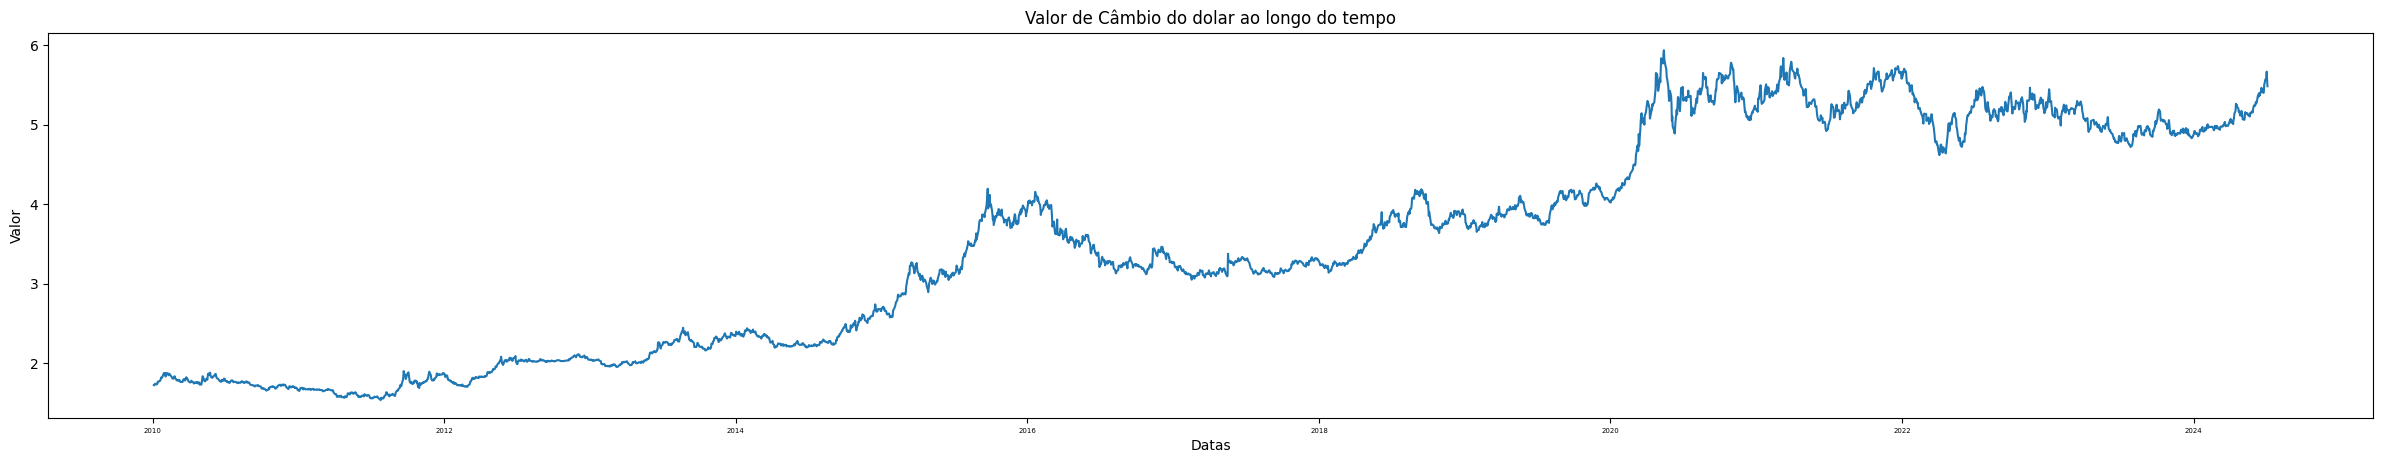

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(30, 5))
plt.plot(df['data'], df['valor'])
plt.xticks(fontsize=5)

plt.title("Valor de Câmbio do dolar ao longo do tempo")
plt.xlabel("Datas")
plt.ylabel("Valor")

plt.show()

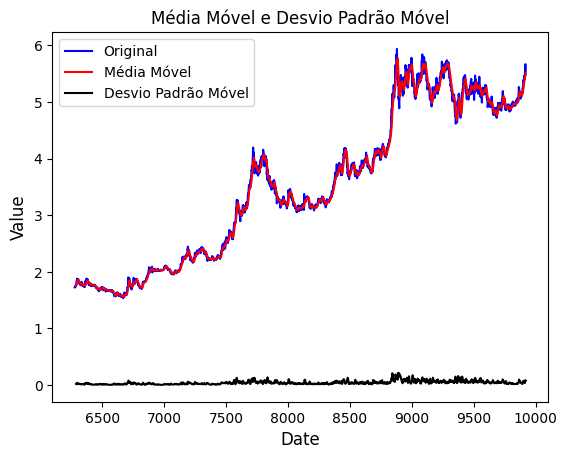

In [ ]:
rolling_mean = df['valor'].rolling(window = 12).mean()
rolling_std = df['valor'].rolling(window = 12).std()
plt.plot(df['valor'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Média Móvel')
plt.plot(rolling_std, color = 'black', label = 'Desvio Padrão Móvel')
plt.xlabel('Date', size = 12)
plt.ylabel('Value', size  = 12)
plt.legend(loc = 'best')
plt.title('Média Móvel e Desvio Padrão Móvel')
plt.show()

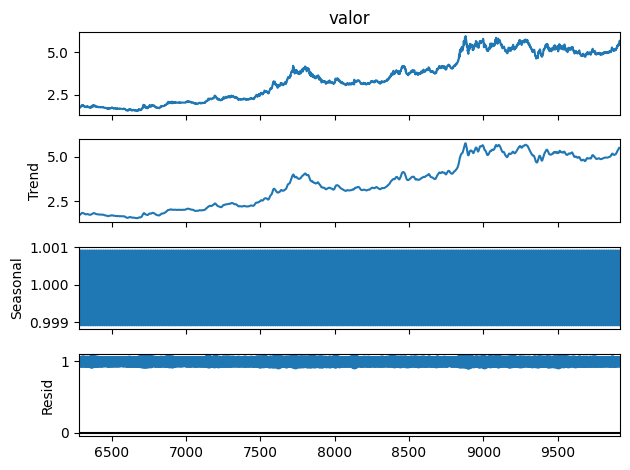

In [ ]:
import statsmodels.api as sm

dec = sm.tsa.seasonal_decompose(df['valor'],period = 12, model = 'multiplicative')
dec.plot()
plt.show()

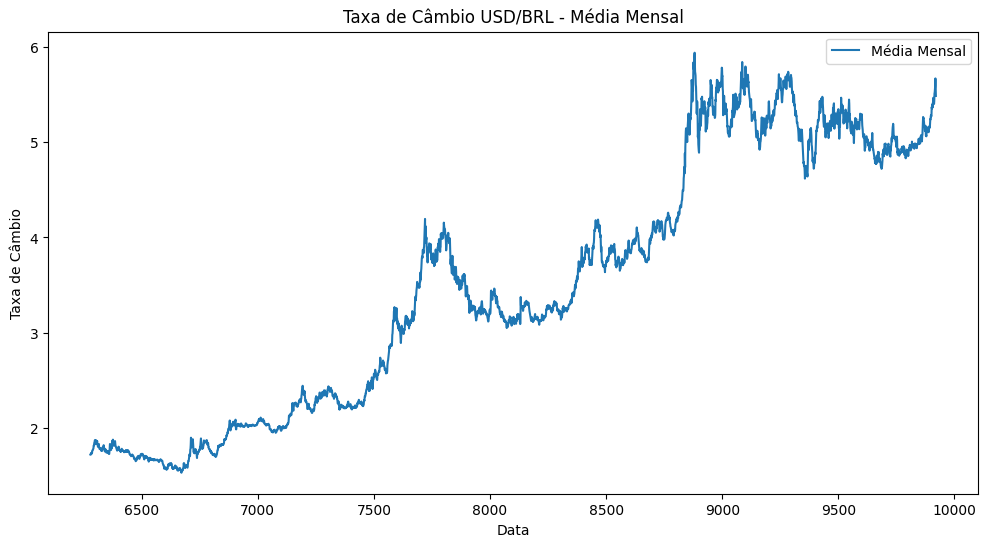

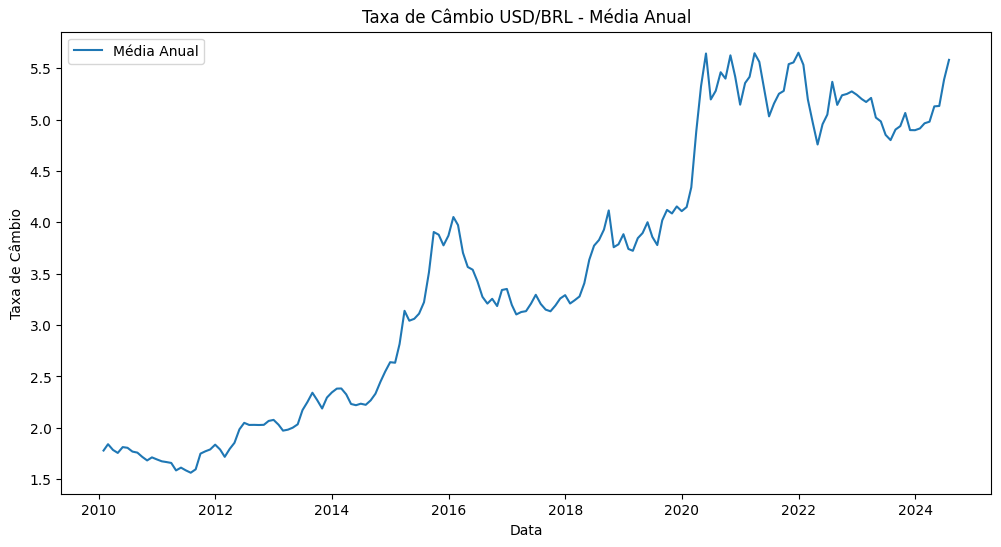

In [ ]:
df_monthly = df

plt.figure(figsize=(12, 6))
plt.plot(df_monthly['valor'], label='Média Mensal')
plt.title('Taxa de Câmbio USD/BRL - Média Mensal')
plt.xlabel('Data')
plt.ylabel('Taxa de Câmbio')
plt.legend()
plt.show()

df_yearly = df.resample('M', on='data').mean()

plt.figure(figsize=(12, 6))
plt.plot(df_yearly['valor'], label='Média Anual')
plt.title('Taxa de Câmbio USD/BRL - Média Anual')
plt.xlabel('Data')
plt.ylabel('Taxa de Câmbio')
plt.legend()
plt.show()


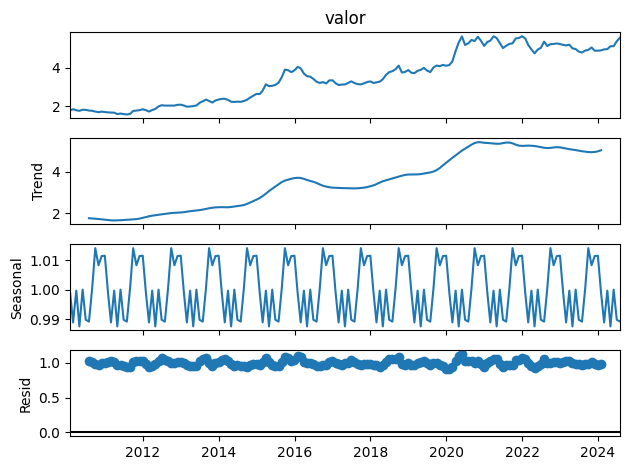

In [ ]:
dec = sm.tsa.seasonal_decompose(df_yearly['valor'],period = 12, model = 'multiplicative')
dec.plot()
plt.show()

Com a média diária eram dados demais para trabalhar, mas com a média anual (mais para média mensal) é mais simples de conseguir insights sobre os dados.

# Aplicação de Modelos


## ARIMA

In [ ]:
from pmdarima import auto_arima

model_auto_arima = auto_arima(df['valor'],
                              seasonal=False,
                              stepwise=True,
                              suppress_warnings=True)

# Exibir os melhores parâmetros encontrados
print(model_auto_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3642
Model:               SARIMAX(0, 1, 1)   Log Likelihood                6971.144
Date:                Sun, 07 Jul 2024   AIC                         -13936.288
Time:                        20:28:52   BIC                         -13917.688
Sample:                             0   HQIC                        -13929.663
                               - 3642                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0010      0.001      1.631      0.103      -0.000       0.002
ma.L1          0.0659      0.010      6.686      0.000       0.047       0.085
sigma2         0.0013   1.48e-05     85.818      0.0

In [ ]:

forecast_auto_arima = model_auto_arima.predict(n_periods=10)

last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=11, freq='M')

future_dates = future_dates[1:]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
print(forecast_auto_arima)

3642    5.477896
3643    5.478924
3644    5.479953
3645    5.480982
3646    5.482010
3647    5.483039
3648    5.484068
3649    5.485096
3650    5.486125
3651    5.487154
dtype: float64


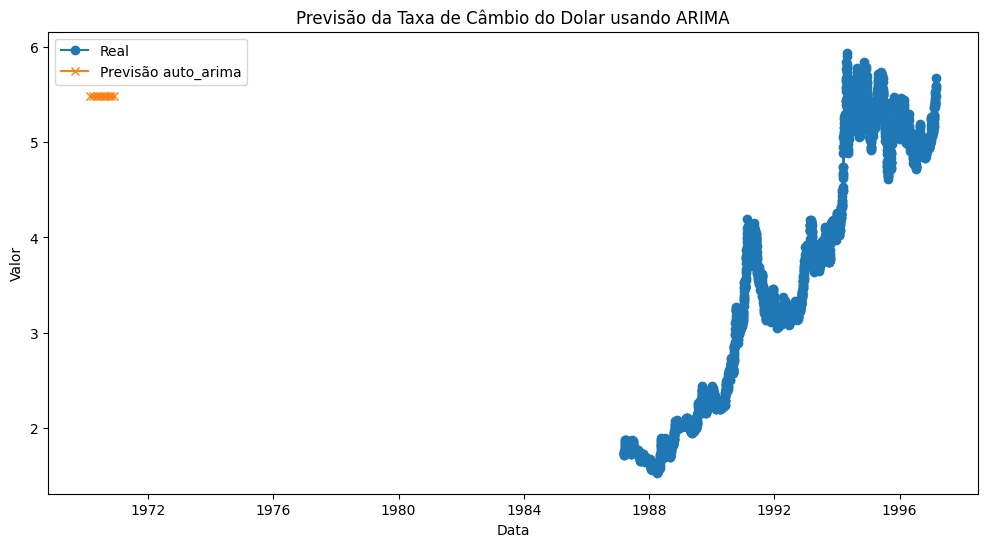

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['valor'], label='Real', marker='o')
plt.plot(future_dates, forecast_auto_arima, label='Previsão auto_arima', marker='x')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Previsão da Taxa de Câmbio do Dolar usando ARIMA')
plt.legend()
plt.show()

In [ ]:
from pmdarima.model_selection import train_test_split

train, test = train_test_split(df['valor'], test_size=0.2)

In [ ]:
from pmdarima import auto_arima

model_auto_arima = auto_arima(train,
                              seasonal=False,
                              stepwise=True,
                              suppress_warnings=True)

print(model_auto_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2913
Model:               SARIMAX(1, 1, 0)   Log Likelihood                5737.487
Date:                Sun, 07 Jul 2024   AIC                         -11468.974
Time:                        20:27:50   BIC                         -11451.044
Sample:                             0   HQIC                        -11462.515
                               - 2913                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.001      1.851      0.064   -6.81e-05       0.002
ar.L1          0.0377      0.010      3.809      0.000       0.018       0.057
sigma2         0.0011    1.3e-05     87.568      0.0

# Prophet


Agora, aplicaremos o prophet com o intuito de comparar com o arima.


In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

df_prophet = df.rename(columns={'data': 'ds', 'valor': 'y'})

# Converter a coluna 'ds' para datetime
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# Verificar os dados
df_prophet.head()

,ds,y
6279,2010-01-04,1.7232
6280,2010-01-05,1.7219
6281,2010-01-06,1.7329
6282,2010-01-07,1.7405
6283,2010-01-08,1.7382


In [ ]:
train_size = int(0.8 * len(df_prophet))
train_df = df_prophet[:train_size]
test_df = df_prophet[train_size:]

# Verificar os conjuntos de treino e teste
print("Conjunto de treino:")
print(train_df.tail())
print("\nConjunto de teste:")
print(test_df.head())

Conjunto de treino:
             ds       y
9187 2021-08-02  5.1373
9188 2021-08-03  5.2458
9189 2021-08-04  5.2085
9190 2021-08-05  5.1459
9191 2021-08-06  5.2404

Conjunto de teste:
             ds       y
9192 2021-08-09  5.2768
9193 2021-08-10  5.2211
9194 2021-08-11  5.2007
9195 2021-08-12  5.2345
9196 2021-08-13  5.2468


In [ ]:
# Inicializar o modelo Prophet
model_prophet = Prophet()

# Ajustar o modelo aos dados de treino
model_prophet.fit(train_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnbsy6_kg/sb58r0p2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnbsy6_kg/sg5idj_0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20147', 'data', 'file=/tmp/tmpnbsy6_kg/sb58r0p2.json', 'init=/tmp/tmpnbsy6_kg/sg5idj_0.json', 'output', 'file=/tmp/tmpnbsy6_kg/prophet_modelf7e61gij/prophet_model-20240707203723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:37:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:37:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


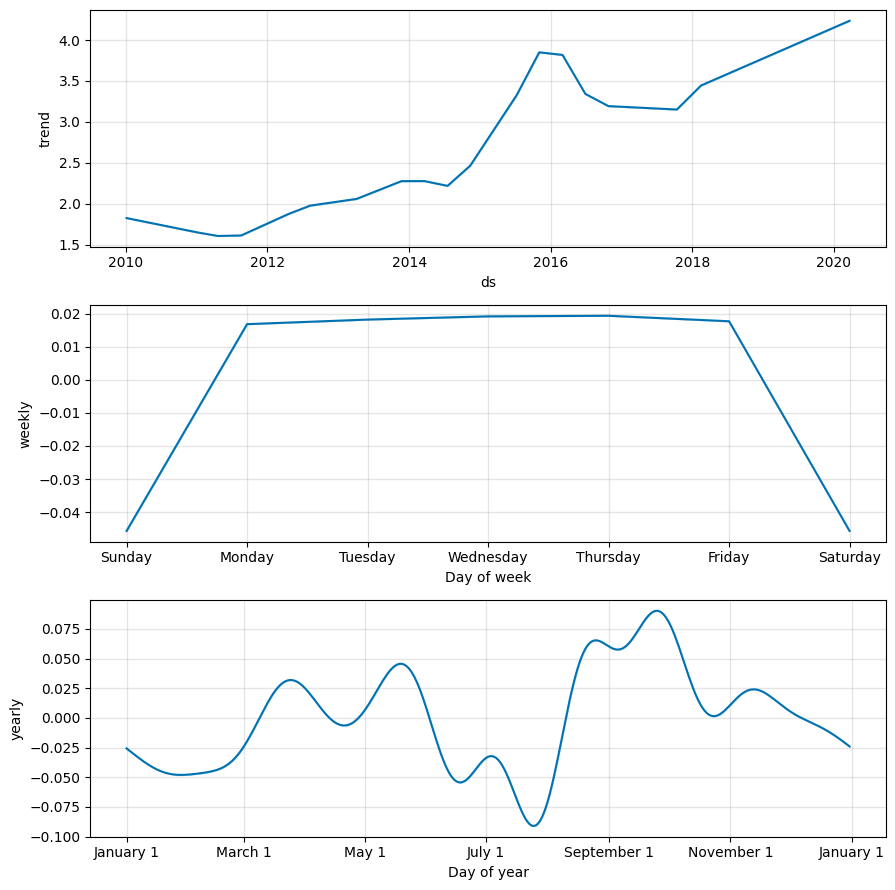

In [ ]:
# Plotar componentes da previsão
fig2 = model_prophet.plot_components(forecast)
plt.show()


Mean Absolute Error (MAE) no conjunto de teste: 1.838791811333369


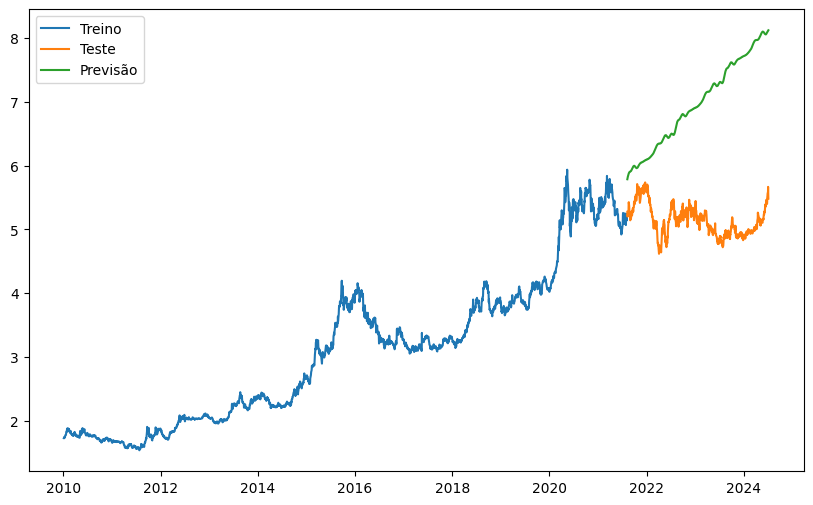

In [ ]:
# Fazer previsões no conjunto de teste
future_test = test_df[['ds']]
forecast_test = model_prophet.predict(future_test)

# Avaliar o desempenho do modelo
mae = mean_absolute_error(test_df['y'], forecast_test['yhat'])
print(f"Mean Absolute Error (MAE) no conjunto de teste: {mae}")

# Visualizar as previsões no conjunto de teste
plt.figure(figsize=(10, 6))
plt.plot(train_df['ds'], train_df['y'], label='Treino')
plt.plot(test_df['ds'], test_df['y'], label='Teste')
plt.plot(test_df['ds'], forecast_test['yhat'], label='Previsão')
plt.legend()
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnbsy6_kg/1krkhacb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnbsy6_kg/ljk1esgc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14849', 'data', 'file=/tmp/tmpnbsy6_kg/1krkhacb.json', 'init=/tmp/tmpnbsy6_kg/ljk1esgc.json', 'output', 'file=/tmp/tmpnbsy6_kg/prophet_modelx7jd16ha/prophet_model-20240707203948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:39:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:39:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


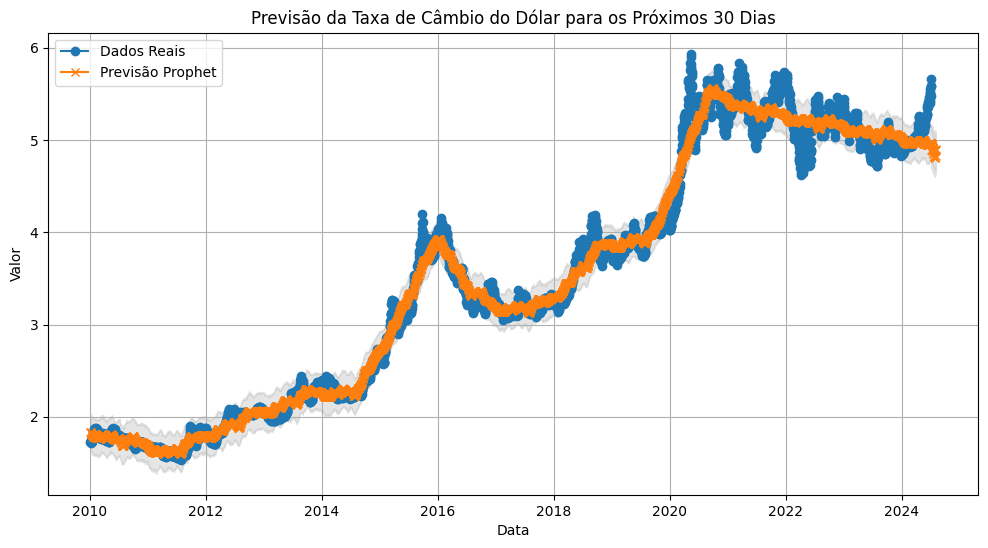

In [ ]:
df_prophet = df.rename(columns={'data': 'ds', 'valor': 'y'})

# Inicializar o modelo Prophet
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Criar DataFrame com as datas futuras (30 dias)
future = model_prophet.make_future_dataframe(periods=30)

# Fazer previsões para as datas futuras
forecast = model_prophet.predict(future)

# Visualizar as previsões para os próximos 30 dias
plt.figure(figsize=(12, 6))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Dados Reais', marker='o')
plt.plot(forecast['ds'], forecast['yhat'], label='Previsão Prophet', marker='x')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Previsão da Taxa de Câmbio do Dólar para os Próximos 30 Dias')
plt.legend()
plt.grid(True)
plt.show()